In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Specify the path to your dataset in Google Drive
dataset_path = '/content/drive/MyDrive/heart.csv'

# Load the dataset
data = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Get summary statistics
print("\nSummary Statistics:")
print(data.describe())

Dataset Preview:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Summary Statistics:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split the dataset into features (X) and target (y)
X = data.drop('target', axis=1)  # Replace 'target' with the actual target column name
y = data['target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [4]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree as a Graphviz dot file
dot_data = export_graphviz(
    dt_clf,
    out_file=None,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],  # Replace with actual class names
    filled=True,
    rounded=True,
    special_characters=True
)

# Render the tree using Graphviz
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Saves as a PDF file
graph.view()  # Opens the tree visualization

'decision_tree.pdf'

In [5]:
from sklearn.metrics import accuracy_score

# Evaluate the model
train_accuracy = accuracy_score(y_train, dt_clf.predict(X_train))
test_accuracy = accuracy_score(y_test, dt_clf.predict(X_test))

print(f"\nDecision Tree Training Accuracy: {train_accuracy:.2f}")
print(f"Decision Tree Testing Accuracy: {test_accuracy:.2f}")

# Control tree depth to prevent overfitting
dt_clf_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_clf_pruned.fit(X_train, y_train)

# Evaluate the pruned model
train_accuracy_pruned = accuracy_score(y_train, dt_clf_pruned.predict(X_train))
test_accuracy_pruned = accuracy_score(y_test, dt_clf_pruned.predict(X_test))

print(f"\nPruned Decision Tree Training Accuracy: {train_accuracy_pruned:.2f}")
print(f"Pruned Decision Tree Testing Accuracy: {test_accuracy_pruned:.2f}")


Decision Tree Training Accuracy: 1.00
Decision Tree Testing Accuracy: 0.99

Pruned Decision Tree Training Accuracy: 0.85
Pruned Decision Tree Testing Accuracy: 0.78


In [6]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Evaluate the Random Forest model
rf_train_accuracy = accuracy_score(y_train, rf_clf.predict(X_train))
rf_test_accuracy = accuracy_score(y_test, rf_clf.predict(X_test))

print(f"\nRandom Forest Training Accuracy: {rf_train_accuracy:.2f}")
print(f"Random Forest Testing Accuracy: {rf_test_accuracy:.2f}")


Random Forest Training Accuracy: 1.00
Random Forest Testing Accuracy: 0.99


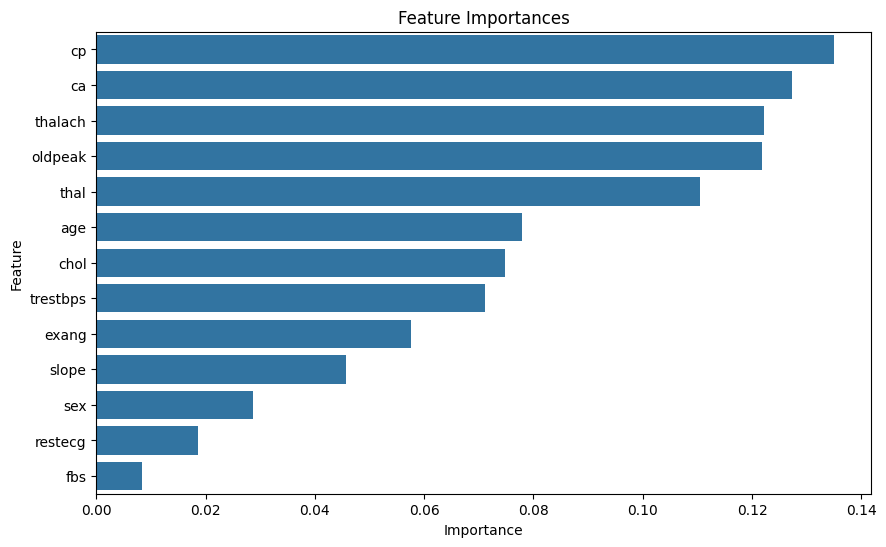

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
feature_importances = rf_clf.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

In [8]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Decision Tree
dt_scores = cross_val_score(dt_clf, X, y, cv=5, scoring='accuracy')
print(f"\nDecision Tree CV Accuracy: {dt_scores.mean():.2f} ± {dt_scores.std():.2f}")

# Cross-validation for Random Forest
rf_scores = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy')
print(f"Random Forest CV Accuracy: {rf_scores.mean():.2f} ± {rf_scores.std():.2f}")


Decision Tree CV Accuracy: 1.00 ± 0.00
Random Forest CV Accuracy: 1.00 ± 0.01
